In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from utils import utility
from utils.encoder import OneHotEncoder, ThermometerEncoder, IntegerEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import classification_report
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
col_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class']
df = pd.read_csv('breast.csv',index_col=False, low_memory=False, header=None, names=col_names)
df = df.dropna()
len(df[df['class']==1]), len(df[df['class']==2])

(444, 239)

In [6]:
ordinal_features = col_names[:-1] 
label = ['class']
ordinal_dic = {col : list(range(1, 10+1, 1)) for col in ordinal_features}

In [17]:
res, models = utility.k_fold_validation(k=10, 
                  df=df, 
                  encoders=[OneHotEncoder, IntegerEncoder, ThermometerEncoder], 
                  pred_task=
                    {
                      'name': 'classification',
                      'model': XGBClassifier(),
                      'metric': {'clf_rep': lambda y_true, y_pred: classification_report(y_true, y_pred, output_dict=True)}
                    }, 
                  features=
                    {
                      'ordinal': {
                        'name': ordinal_features,
                        'dict': ordinal_dic
                      }
                    },
                    return_model=True)

c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

In [ ]:
# import random
# from sklearn.model_selection import KFold
# k=10
# regr = LogisticRegression(max_iter=1000)
# test_pred_res, test_true_res = [], []
# train_pred_res, train_true_res = [], []
# # sc = StandardScaler()
# kf = KFold(k)   
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for train_index, test_index in kf.split(df):
#     X_train, y_train, X_test, y_test = X.iloc[train_index], pd.DataFrame(y.iloc[train_index]), X.iloc[test_index], pd.DataFrame(y.iloc[test_index])
#     # random_train, random_test, _ = utility.encoding_pipeline(X_train[ordinal_features_plus], X_test[ordinal_features_plus], ThermometerEncoder, ordinal_dic_plus)
#     # nominal_train, nominal_test, _ = utility.encoding_pipeline(X_train[nominal_features], X_test[nominal_features], OneHotEncoder, nominal_dic)
#     ordinal_train, ordinal_test, _ = utility.encoding_pipeline(X_train[ordinal_features], X_test[ordinal_features], OneHotEncoder, ordinal_dic)
#     # other_train, other_test = np.array(X_train[other_features].values), np.array(X_test[other_features].values)
#     # sc.fit(other_train)
#     # other_train, other_test = sc.transform(other_train), sc.transform(other_test)
#     # y_train, y_test, _ = utility.encoding_pipeline(y_train, y_test, IntegerEncoder, label_dic)
#     # X_train_all, X_test_all = ordinal_train, ordinal_test
#     X_train_all, X_test_all = np.concatenate([ordinal_train], axis=1), np.concatenate([ordinal_test], axis=1)
#     # X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train, random_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test, random_test], axis=1)
#     regr.fit(X_train_all, y_train)
#     y_pred_test = regr.predict(X_test_all)
#     y_pred_train = regr.predict(X_train_all)
#     test_true_res = test_true_res+ [np.squeeze(y_test)] if len(test_true_res)> 0 else [np.squeeze(y_test)]
#     test_pred_res = test_pred_res+ [np.squeeze(y_pred_test)] if len(test_pred_res)> 0 else [np.squeeze(y_pred_test)]
#     train_true_res = train_true_res+ [np.squeeze(y_train)] if len(train_true_res)> 0 else [np.squeeze(y_train)]
#     train_pred_res = train_pred_res+ [np.squeeze(y_pred_train)] if len(train_pred_res)> 0 else [np.squeeze(y_pred_train)]

# test_temp_res, train_temp_res = [], []
# for i in range(k):
#     test_temp_res.append(classification_report(test_true_res[i], test_pred_res[i], output_dict=True)) 
#     train_temp_res.append(classification_report(train_true_res[i], train_pred_res[i], output_dict=True)) 
# clf_rep_dic_test, clf_rep_dic_train = utility.concat_dic(*test_temp_res), utility.concat_dic(*train_temp_res)
# test_res, train_res = utility.mean_std_dic(clf_rep_dic_test), utility.mean_std_dic(clf_rep_dic_train)

In [18]:
def encoding(X_train, encoder, dic, step_sizes=None):
    cat_encoder = encoder(dic, step_sizes) 
    return utility.concat(cat_encoder(X_train))

k=10
kf = KFold(k) 
chosen_class = 1 #class is already encoded to 1, 2
class_index = chosen_class-1
sc = StandardScaler()
result_dic = {}
for feature, unique_val in ordinal_dic.items():
    feature_pred_prob = {}
    for encoder in [OneHotEncoder, ThermometerEncoder, IntegerEncoder]:
        temp_df = df.copy()
        levels_pred_prob_mean = []
        levels_pred_prob_std = []
        for val in unique_val:
            temp_df[feature] = temp_df[feature].map(lambda x: val)
            models_pred_prob_mean = []
            for i, (_, test_index) in enumerate(kf.split(df)):
                chosen_df = temp_df.iloc[test_index] 
                chosen_df = chosen_df[chosen_df['class'] == chosen_class]
                chosen_df = chosen_df.iloc[:, :-1]
                model = models[encoder.__str__()][i]
                X_ordinal = encoding(chosen_df[ordinal_features], encoder, ordinal_dic)
                X_all = X_ordinal
                pred_prob = model.predict_proba(X_all)[:, class_index]
                models_pred_prob_mean.append(np.mean(pred_prob))
            levels_pred_prob_mean.append(np.mean(models_pred_prob_mean))
            levels_pred_prob_std.append(np.std(models_pred_prob_mean))
        feature_pred_prob[encoder.__str__()] = [levels_pred_prob_mean]+[levels_pred_prob_std]
    result_dic[feature] = feature_pred_prob    
                
    

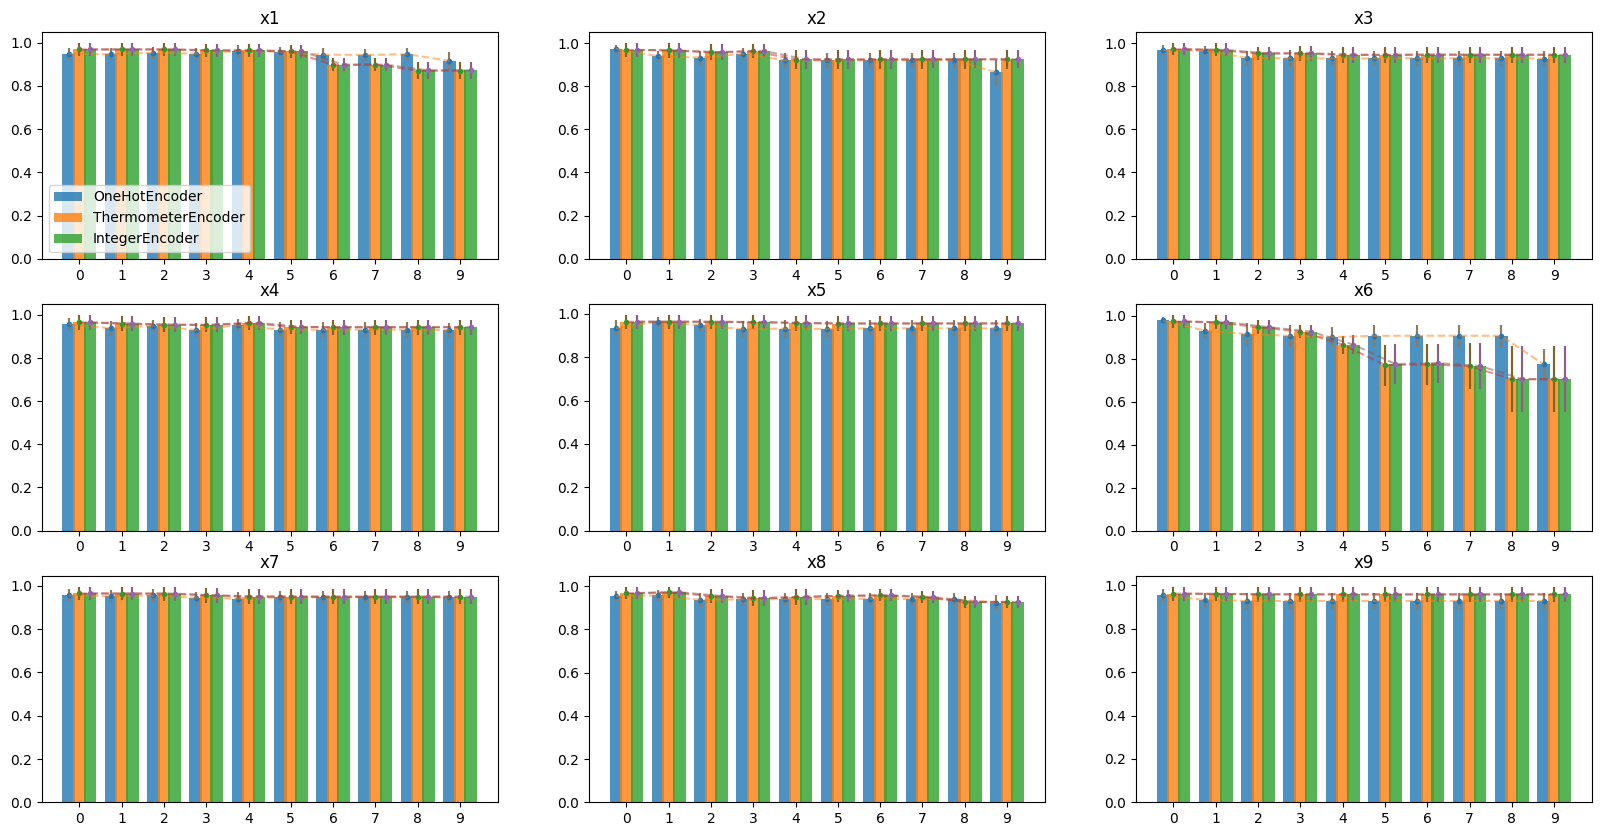

In [19]:
import matplotlib.pyplot as plt
label=['OneHotEncoder', 'ThermometerEncoder', 'IntegerEncoder']
x_axis_placement = [-0.25, 0, 0.25]
fig, ax = plt.subplots(3,3, figsize=(20,10))
ax = ax.ravel()
for i, (key, val) in enumerate(ordinal_dic.items()):
    for j, enc_name in enumerate(label):
        ax[i].bar(np.array(range(len(val)))+x_axis_placement[j], result_dic[key][enc_name][0], label = enc_name, alpha = 0.8, width=0.3)
        ax[i].errorbar(np.array(range(len(val)))+x_axis_placement[j], result_dic[key][enc_name][0], result_dic[key][enc_name][1], alpha = 1, fmt='.')
        ax[i].errorbar(np.array(range(len(val)))+x_axis_placement[j], result_dic[key][enc_name][0], result_dic[key][enc_name][1], alpha = 0.5, fmt='--')
        ax[i].set_title(key)
        ax[i].set_xticks(range(len(val)))

        
ax[0].legend() 
plt.savefig('breast_result/breast_cv_xgb_pred_prob.png')

In [23]:
k=10
spec_dic = {key: [] for key in ordinal_dic.keys()}
for i in range(k):
    ohe_1 = models['OneHotEncoder'][i]
    te_1 = models['ThermometerEncoder'][i]
    ie_1 = models['IntegerEncoder'][i]

    ord_coef_dic = utility.create_coef_dic(0, ordinal_dic, ohe_1.coef_,te_1.coef_)
    ord_coef_dic_cum = {key: [val[0]]+[np.cumsum(val[1])] for key, val in ord_coef_dic.items()}
    for key, val in ord_coef_dic_cum.items():
        spec_dic[key] += [np.corrcoef(val)[0][1]]
spec_dic_mean_std = {key : (np.mean(val), np.std(val)) for key, val in spec_dic.items()}   

In [11]:
import math
mean = 10**2
std = 10**3
dicc = {key : (math.ceil(float(val[0])*mean)/mean, math.ceil(float(val[1])*std)/std) for key, val in spec_dic_mean_std.items()}
dicc

{'x1': (0.92, 0.009),
 'x2': (0.95, 0.032),
 'x3': (0.97, 0.013),
 'x4': (0.83, 0.016),
 'x5': (0.7, 0.039),
 'x6': (0.94, 0.02),
 'x7': (0.85, 0.018),
 'x8': (0.93, 0.028),
 'x9': (0.69, 0.047)}

: 

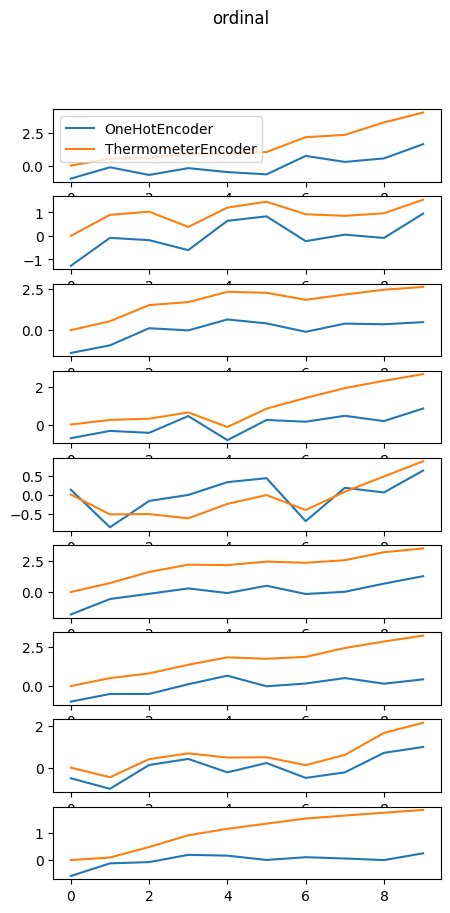

: 

In [17]:
import matplotlib.pyplot as plt

label=['OneHotEncoder', 'ThermometerEncoder', 'IntegerEncoder']

fig, ax = plt.subplots(len(ord_coef_dic.keys()), 1, figsize=(5,10))
fig.suptitle('ordinal')
for i, (key, val) in enumerate(ord_coef_dic_cum.items()):
    for j in range(len(val)):
        ax[i].plot(range(len(val[j])), val[j], label = label[j])
ax[0].legend()    


In [11]:
d = 8
for encoder in res.keys():
    res[encoder]['clf_rep']['accuracy'] = {key: res[encoder]['clf_rep']['accuracy'] for key in res[encoder]['clf_rep']['macro avg'].keys()}
df_lists = [utility.round_decimal_places(pd.DataFrame(res[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns"), d) for key in res.keys()]

with open('breast_result/breast_cv_xgb.csv','w') as f:
    for df in df_lists:
        f.write(f"{df.columns.name}\n")
        df.to_csv(f)
        f.write("\n")

In [ ]:
import numpy as np

def concat_dic(*dic_list):
    res_dic = dic_list[0].copy()
    for key in res_dic.keys():
        temp_res = []
        for dic in dic_list:
            temp_res.append(dic[key])
        res_dic[key] = concat_dic(*temp_res) if isinstance(res_dic[key], dict) else temp_res
    
    return res_dic
        

In [ ]:
def eval_dic(dic):
    res_dic = dic
    for key, val in res_dic.items():
        res_dic[key] = concat_dic(val) if isinstance(val, dict) else (np.mean(val), np.std(val))

    return res_dic